In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(color_codes=True)

In [6]:
data_lebron = pd.read_csv('lebron_career.csv')

In [7]:
data_lebron.columns = map(str.upper, data_lebron.columns)
# Muda todas as colunas para "Upper"

In [8]:
data_lebron = data_lebron.drop(['GAME'], axis=1)
data_lebron['DATE'] = pd.to_datetime(data_lebron['DATE'])

In [9]:
data_lebron['MP'] = data_lebron['MP'].astype(str)
data_lebron['MP'] = data_lebron['MP'].str.replace(':','.')
data_lebron['MP'] = data_lebron['MP'].astype(float)
data_lebron['AGE'] = data_lebron['AGE'].astype(str)
data_lebron['AGE'] = data_lebron['AGE'].str.replace('-','.')
data_lebron['AGE'] = data_lebron['AGE'].astype(float)

In [10]:
data_lebron['RESULT'] = data_lebron['RESULT'].str[:1]

In [11]:
data_lebron.head()

,DATE,AGE,TEAM,OPP,RESULT,MP,FG,FGA,FGP,THREE,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,GAME_SCORE,MINUS_PLUS
0,2003-10-29,18.303,CLE,SAC,L,42.0,12,20,0.600,0,...,2,4,6,9,4,0,2,25,24.7,-9
1,2003-10-30,18.304,CLE,PHO,L,41.0,8,17,0.471,1,...,2,10,12,8,1,0,7,21,14.7,-3
2,2003-11-01,18.306,CLE,POR,L,39.0,3,12,0.250,0,...,0,4,4,6,2,0,2,8,5.0,-21
3,2003-11-05,18.310,CLE,DEN,L,41.0,3,11,0.273,0,...,2,9,11,7,2,3,2,7,11.2,-3
4,2003-11-07,18.312,CLE,IND,L,44.0,8,18,0.444,1,...,0,5,5,3,0,0,7,23,9.0,-7


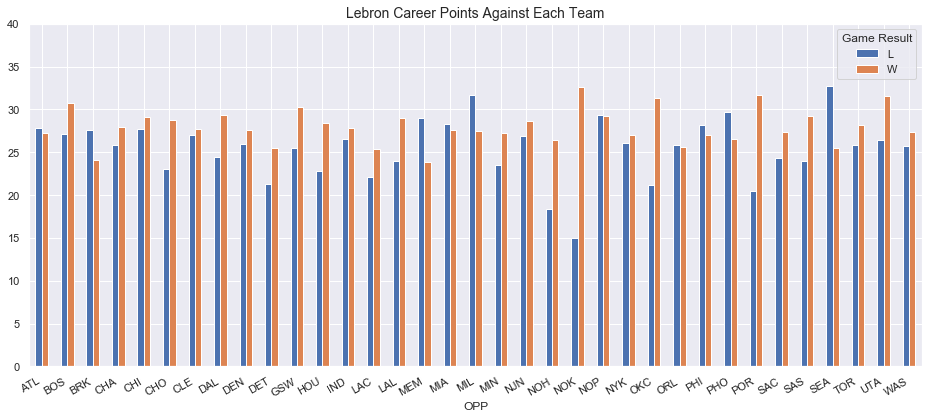

In [12]:
fig, ax = plt.subplots(figsize=(16,7))

data_lebron_opp = data_lebron.pivot_table(columns='RESULT',index='OPP', values='PTS')
data_lebron_opp.plot(ax=ax, kind='bar')

ax.set_ylim(0, 40)
ax.set_title("Lebron Career Points Against Each Team", fontsize=14, )
ax.legend(loc='upper right', title='Game Result')

fig.autofmt_xdate()

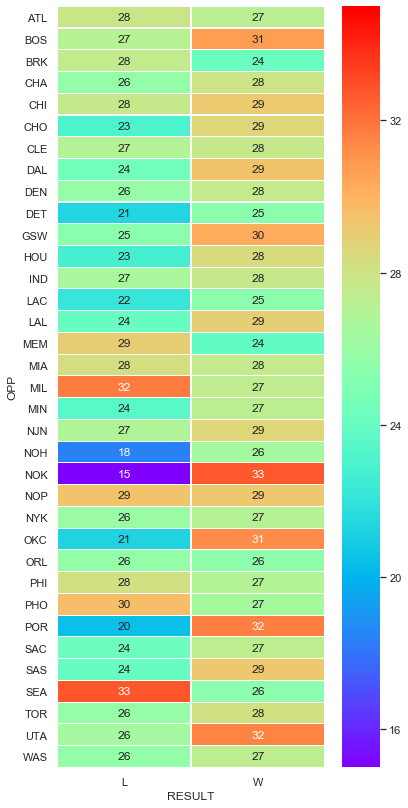

In [13]:
fig, ax = plt.subplots(figsize=(6, 14))

sns.heatmap(data_lebron_opp, center=25, cmap="rainbow", vmin=15, vmax=35, annot=True, robust=True, linewidth=.1)

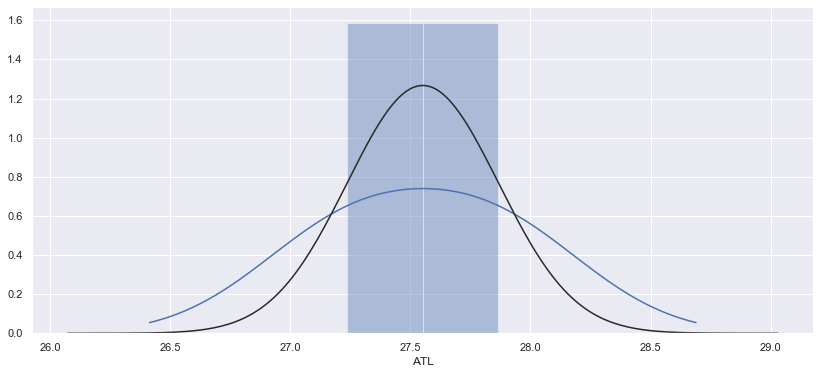

In [18]:
fig, ax = plt.subplots(figsize=(14, 6))
from scipy.stats import norm
sns.distplot(data_lebron_opp.iloc[0], fit=norm, ax=ax)

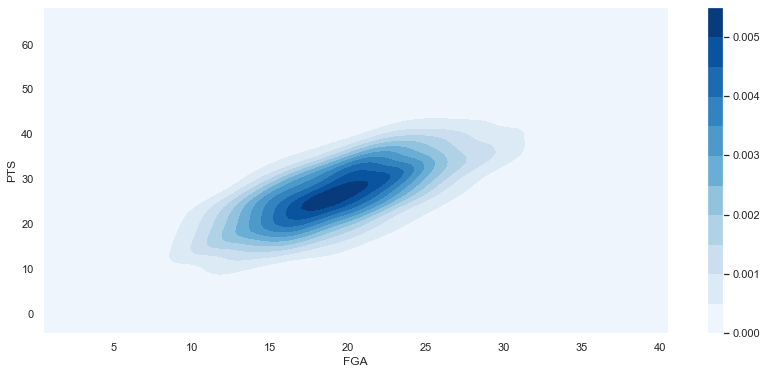

In [15]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.kdeplot(data_lebron.FGA, data_lebron.PTS, shade=True, cmap='Blues', cbar=True)

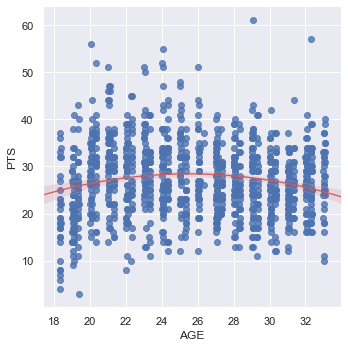

In [20]:
sns.lmplot('AGE', 'PTS', data=data_lebron, order=2,
          line_kws={'color':'indianred', 'linewidth':1.3})

In [21]:
data_jordan = pd.read_csv('jordan_career.csv')

In [22]:
data_jordan = data_jordan.fillna(0)

In [23]:
data_jordan.columns = map(str.upper, data_jordan.columns)
data_jordan = data_jordan.drop(['GAME'], axis=1)
data_jordan['DATE'] = pd.to_datetime(data_jordan['DATE'])
data_jordan['MP'] = data_jordan['MP'].astype(str)
data_jordan['MP'] = data_jordan['MP'].str.replace(':','.')
data_jordan['MP'] = data_jordan['MP'].astype(float)
data_jordan['AGE'] = data_jordan['AGE'].astype(str)
data_jordan['AGE'] = data_jordan['AGE'].str.replace('-','.')
data_jordan['AGE'] = data_jordan['AGE'].astype(float)

In [24]:
data_jordan['RESULT'] = data_jordan['RESULT'].str[:1]

In [25]:
ser1 = data_lebron.mean()
ser2 = data_jordan.mean()

lebron_mean = pd.DataFrame(ser1).transpose()
jordan_mean = pd.DataFrame(ser2).transpose()

dataset = pd.DataFrame(pd.concat([lebron_mean, jordan_mean], ignore_index=True))

In [26]:
dataset = dataset.rename(index={0:'Lebron', 1:'Jordan'})

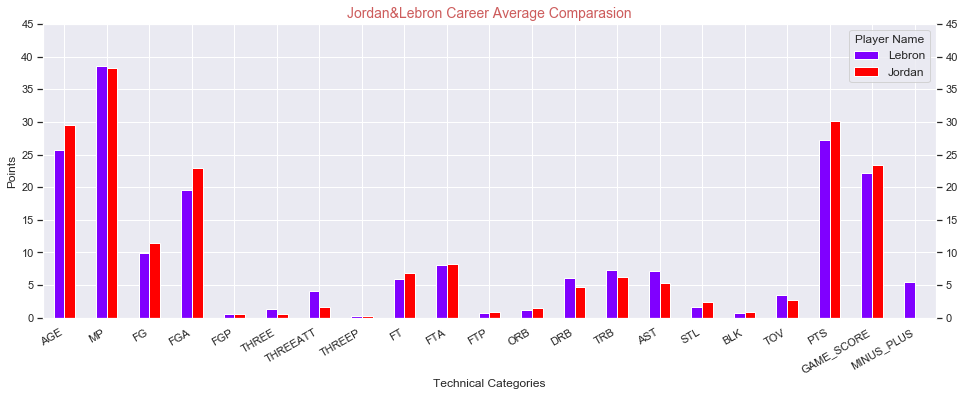

In [27]:
fig, ax = plt.subplots(figsize=(16,6))

dataset.transpose().plot(ax=ax, kind='bar', colormap='rainbow')

ax.set_title("Jordan&Lebron Career Average Comparasion", fontsize=14, color='indianred')
ax.set_xlabel("Technical Categories", fontsize=12)
ax.set_ylabel("Points", fontsize=12)

ax.set_ylim(0, 45)
ax.legend(fontsize=12, title='Player Name')
ax.tick_params('y', direction='out', left=True, right=True, labelright=True, labelleft=True)

fig.autofmt_xdate()

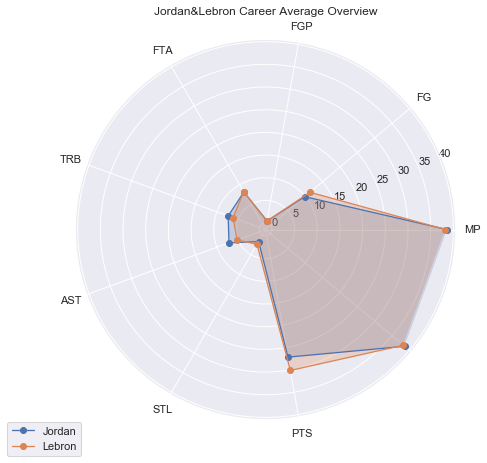

In [28]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, polar=True)

labels = np.array(['MP', 'FG', 'FGP', 'FTA', 'TRB', 'AST', 'STL', 'PTS'])
stats1 = dataset.loc['Lebron', labels].values
stats2 = dataset.loc['Jordan', labels].values

angles=np.linspace(0, 2*np.pi, len(labels)+1, endpoint=False)
stats1=np.concatenate((stats1,[stats1[0]]))
stats2=np.concatenate((stats2,[stats2[0]]))

ax.plot(angles, stats1, 'o-', linewidth=1.3)
ax.fill(angles, stats1, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)

ax.plot(angles, stats2, 'o-', linewidth=1.3)
ax.fill(angles, stats2, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)

ax.set_title("Jordan&Lebron Career Average Overview")
ax.grid(True)
# set the legend and the location.
label_texts=('Jordan','Lebron')
ax.legend(label_texts, loc='upper right', bbox_to_anchor=(0.03 , 0.01))

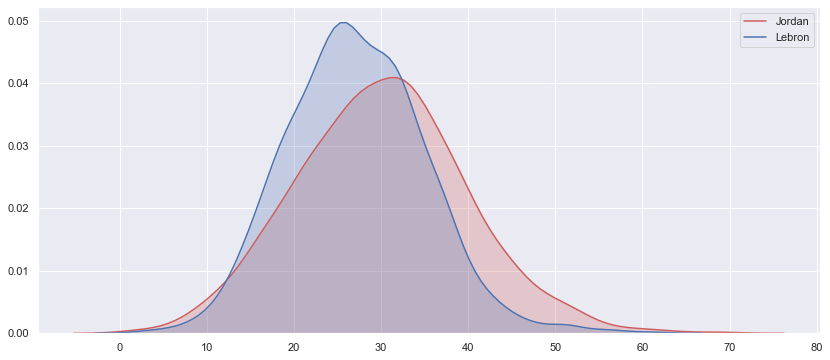

In [29]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.kdeplot(data_jordan.PTS, shade=True, color='indianred', label='Jordan')
sns.kdeplot(data_lebron.PTS, shade=True, label='Lebron')

In [30]:
data_jordan_opp = pd.pivot_table(data_jordan, index='OPP', columns='RESULT', values='PTS')

Text(0.5, 1, 'Lebron Career Average.')

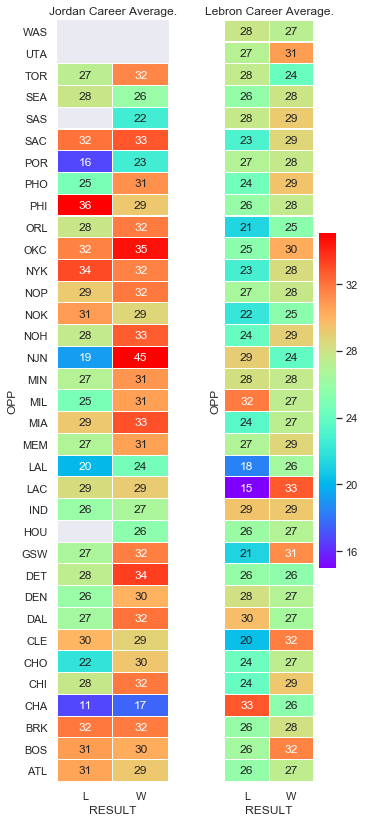

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(5, 14))
fig.subplots_adjust(wspace=0.5)

ax1.set_title("Jordan Career Average.")
sns.heatmap(data_jordan_opp, ax=ax1, annot=True, cmap="rainbow",
            center=25, linewidths=.1, cbar=False, robust=True)
sns.heatmap(data_lebron_opp, ax=ax2, center=25, cmap="rainbow", vmin=15, vmax=35, annot=True, 
            cbar=True, linewidth=.1)
ax2.set_title("Lebron Career Average.")

In [32]:
data_lebron.describe()

,AGE,MP,FG,FGA,FGP,THREE,THREEATT,THREEP,FT,FTA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,GAME_SCORE,MINUS_PLUS
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1092.000000,1132.000000,1132.000000,...,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,25.644777,38.620830,9.866608,19.585689,0.505467,1.409894,4.103357,0.309266,6.005300,8.126325,...,1.212898,6.136926,7.349823,7.163428,1.640459,0.782686,3.463781,27.148410,22.224735,5.467314
std,4.334470,5.062429,3.099422,4.868082,0.114112,1.396538,2.346039,0.253228,3.449518,4.220171,...,1.184072,2.684365,3.004192,2.880583,1.313962,0.924440,1.834321,7.887419,7.790812,12.712345
min,18.303000,17.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-0.100000,-39.000000
25%,22.035500,35.577500,8.000000,16.000000,0.429000,0.000000,2.000000,0.000000,4.000000,5.000000,...,0.000000,4.000000,5.000000,5.000000,1.000000,0.000000,2.000000,22.000000,17.000000,-3.000000
50%,25.335000,39.025000,10.000000,20.000000,0.500000,1.000000,4.000000,0.333000,6.000000,8.000000,...,1.000000,6.000000,7.000000,7.000000,1.000000,1.000000,3.000000,27.000000,22.600000,6.000000
75%,29.319250,42.100000,12.000000,23.000000,0.579000,2.000000,5.000000,0.500000,8.000000,11.000000,...,2.000000,8.000000,9.000000,9.000000,2.000000,1.000000,5.000000,32.000000,27.200000,14.000000
max,33.081000,55.000000,23.000000,36.000000,0.929000,8.000000,13.000000,1.000000,24.000000,28.000000,...,7.000000,17.000000,19.000000,19.000000,7.000000,5.000000,11.000000,61.000000,53.200000,39.000000


In [33]:
data_jordan.describe()

,AGE,MP,FG,FGA,FGP,THREE,THREEATT,THREEP,FT,FTA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,GAME_SCORE,MINUS_PLUS
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,...,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.0
mean,29.479615,38.258396,11.373134,22.888993,0.495741,0.541978,1.658582,0.188906,6.834888,8.182836,...,1.555970,4.667910,6.223881,5.254664,2.345149,0.833022,2.727612,30.123134,23.440951,0.0
std,5.349324,5.708564,3.825897,5.935995,0.108767,0.970196,1.752960,0.310700,4.075361,4.630327,...,1.442532,2.569624,3.016647,2.722709,1.656353,1.011194,1.733523,9.752002,9.487120,0.0
min,21.252000,12.000000,1.000000,5.000000,0.111000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-1.400000,0.0
25%,25.267500,36.000000,9.000000,19.000000,0.423000,0.000000,0.000000,0.000000,4.000000,5.000000,...,0.000000,3.000000,4.000000,3.000000,1.000000,0.000000,1.000000,23.000000,16.800000,0.0
50%,28.315000,39.000000,11.000000,23.000000,0.500000,0.000000,1.000000,0.000000,6.000000,8.000000,...,1.000000,4.000000,6.000000,5.000000,2.000000,1.000000,3.000000,30.000000,23.450000,0.0
75%,33.335500,42.000000,14.000000,27.000000,0.571000,1.000000,3.000000,0.333000,10.000000,11.000000,...,2.000000,6.000000,8.000000,7.000000,3.000000,1.000000,4.000000,36.000000,29.600000,0.0
max,40.058000,56.000000,27.000000,49.000000,0.828000,7.000000,12.000000,1.000000,26.000000,27.000000,...,8.000000,14.000000,18.000000,17.000000,10.000000,6.000000,9.000000,69.000000,64.600000,0.0
